In [1]:
# No copiar esta huevada. Gracias !!!

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [34]:
archivo = pd.read_csv('vacunas_planvacunarse.csv')
fabricantes = pd.read_csv('fabricantes.csv')

# Generar graficas y reportes del total de personas  vacunadas.

In [35]:
#Generar graficas y reportes del total de personas  vacunadas
print("Vacunados Primera Dosis: ",archivo['primera_dosis'].sum())
print("Vacunados Segunda Dosis: ",archivo['segunda_dosis'].sum())
print("Restan un total de ",(archivo['primera_dosis'].sum()-archivo['segunda_dosis'].sum()))

print("****************************************")
poblacion=17000000
print("Existe una poblacion de ",poblacion,"personas en el ecuador y tenemos ",archivo['primera_dosis'].sum())
print("Nos resta un total de ",poblacion-archivo['primera_dosis'].sum(),"por vacunar")

Vacunados Primera Dosis:  923656
Vacunados Segunda Dosis:  257524
Restan un total de  666132
****************************************
Existe una poblacion de  17000000 personas en el ecuador y tenemos  923656
Nos resta un total de  16076344 por vacunar


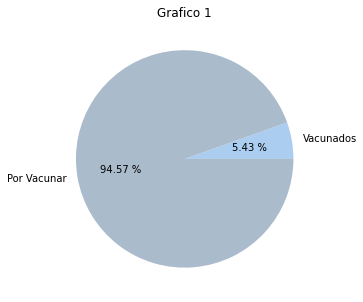

In [36]:
# Generar un grafico de cual es su pie

plt.figure(figsize=(5,5))

etiquetas = ['Vacunados', 'Por Vacunar']
colores = ['#abcdef', '#aabbcc']
plt.pie([archivo['primera_dosis'].sum(), poblacion-archivo['primera_dosis'].sum()], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Grafico 1')
plt.show()

# Generar grafico de pie por fabricante de la vacuna.

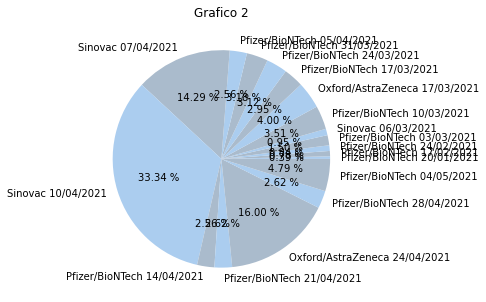

In [37]:
nombrefecha=[]
fechatotalvacunas=[]
for i in range(len(fabricantes['total'])):
    aux=fabricantes['vaccine'][i]+" "+fabricantes['arrived_at'][i]
    nombrefecha.append(aux)
    fechatotalvacunas.append(fabricantes['total'][i])

# Generar un grafico de cual es su pie diestro
plt.figure(figsize=(5,5))

etiquetas = nombrefecha
colores = ['#abcdef', '#aabbcc']
plt.pie(fechatotalvacunas, labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Grafico 2')
plt.show()

# Generar histogramas de vacunas por mes de llega y fabricante.

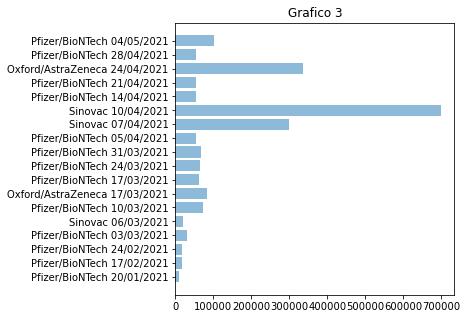

In [38]:
y_pos = np.arange(len(fechatotalvacunas))
plt.figure(figsize=(5,5))
plt.barh(y_pos, fechatotalvacunas, align='center', alpha=0.5)
plt.yticks(y_pos, nombrefecha)
plt.title('Grafico 3')
plt.show()

Total de vacunas por fabricante
              vaccine    total
0  Oxford/AstraZeneca   420000
1     Pfizer/BioNTech   659880
2             Sinovac  1020000


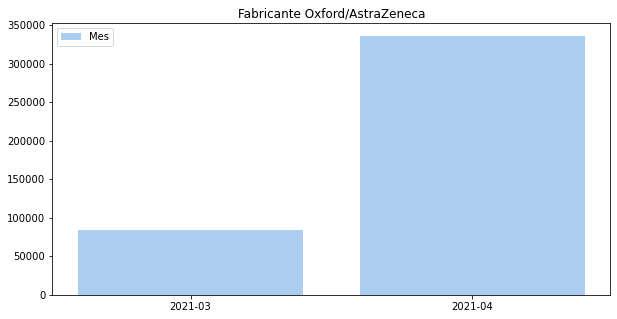

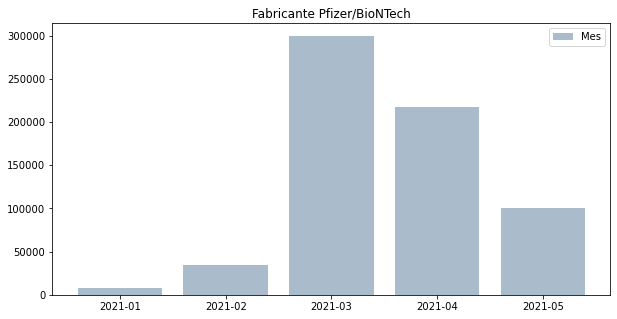

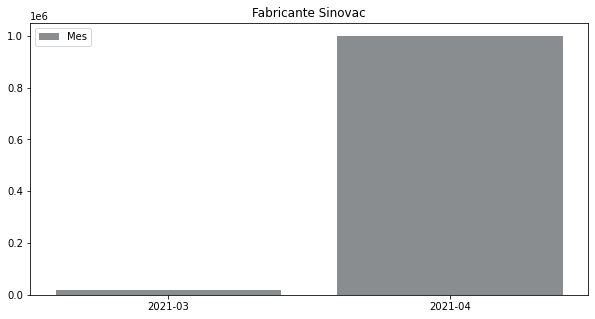

In [39]:
#20/01/2021
#04/05/2021
import matplotlib.pyplot as plt

total=pd.read_csv('total_vacunas.csv')
fabricantes['arrived_at']=pd.to_datetime(fabricantes['arrived_at'],format='%d/%m/%Y')
total['fecha']=pd.to_datetime(total['fecha'],format='%d/%m/%Y')

filtro=fabricantes[(fabricantes['arrived_at'] >= "2021-01-20") & (fabricantes['arrived_at'] <= "2021-05-04")]
grupo=filtro.groupby(['vaccine'], as_index=False)['total'].sum()
print("Total de vacunas por fabricante")
print(grupo)

filtro['arrived_at']=filtro['arrived_at'].astype(str).str.slice(0,7)
f=filtro.groupby(['vaccine','arrived_at']).sum()
f.reset_index(inplace=True)
colors=['#abcdef', '#aabbcc', '#8a8d8f']
cont=0
for i in filtro.groupby(['vaccine'], as_index=False).mean()['vaccine']:
    grupomes=f.loc[(f['vaccine'] == i)]
    plt.figure(figsize = (10,5))
    plt.bar(grupomes['arrived_at'],grupomes['total'], color=colors[cont])
    plt.title('Fabricante '+i)
    plt.legend(["Mes","Mes","Mes"])
    plt.show()
    cont =cont+1

# Grafico de casos por fecha

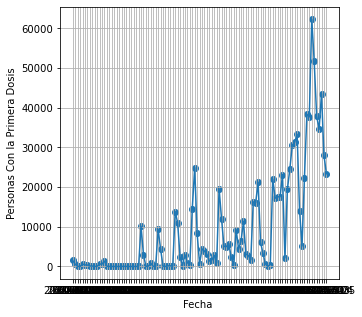

In [40]:
fig = plt.figure(figsize=(5,5))
plt.scatter(archivo['fecha'],archivo['primera_dosis'])
plt.plot(archivo['fecha'],archivo['primera_dosis'])
plt.xlabel('Fecha ')
plt.ylabel('Personas Con la Primera Dosis')
plt.grid()

# Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto.



In [41]:
#Se genero un solo ipynd para este punto nombrado parametrizacion.

# Generar un modelo matemático de predicción basado en regresión, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.

# Prediccion De Primera Dosis


In [58]:
import datetime as dt
archivo['fecha'] = pd.to_datetime(archivo['fecha'])   
archivo['dia'] =  (archivo['fecha'] - archivo['fecha'].min())  / np.timedelta64(1,'D')
archivo['dia']=archivo.iloc[:,3:4].values
archivo['dia']=archivo['dia'].astype(int)

features = archivo.iloc[:,3:4].values
target=archivo.iloc[:,1:2].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model_linear = LinearRegression()
model_linear = model_linear.fit(X_train,y_train)
print("Linear Score : ",model_linear.score(X_test,y_test))

model_poly = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=True))])
model_poly = model_poly.fit(X_train,y_train)
print("Poly Score : ",model_poly.score(X_test,y_test))
Y_pred_pr_Ecuador = model_linear.predict(X_test)

#Variables Respaldo para grafico
X_test_ecuador=X_test
y_test_ecuador=y_test
y_pred=model_linear.predict(X_test).reshape(-1)


Linear Score :  0.49588588319185223
Poly Score :  0.7940945812509957


In [59]:
print("¿A partir de 2021-05-06 cuantos dias en adelante desea predecir?Ingrese solo el numero")
print("Ejemplo: 2 que en fecha seria 2021-05-08 a partir del 2021-05-06 ")
valor_prediccion = input()
datos = [i for i in range(105,105+int(valor_prediccion))]
predicciones= {'{}'.format(i):[model_linear.predict(np.array(i).reshape(1,-1))[0][0],model_poly.predict(np.array(i).reshape(1,-1))[0][0]] for i in datos}

¿A partir de 2021-05-06 cuantos dias en adelante desea predecir?Ingrese solo el numero
Ejemplo: 2 que en fecha seria 2021-05-08 a partir del 2021-05-06 
600


In [60]:
fecha_inicio = datetime(2021, 5, 6, 0, 0, 00, 00000)
for i in range(len(predicciones)):
    new_date = fecha_inicio + timedelta(days=i)
    print("Fecha")
    print(new_date)
    print("Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]")
    print("Lineal: ",predicciones.get(str(i+105))[0])
    print("Polinomial: ", abs(predicciones.get(str(i+105))[1]))
    print("*************************************************************")
    

Fecha
2021-05-06 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  22200.239032361005
Polinomial:  39402.729337782264
*************************************************************
Fecha
2021-05-07 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  22461.831999017086
Polinomial:  41171.97010250292
*************************************************************
Fecha
2021-05-08 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  22723.424965673166
Polinomial:  43012.95930755613
*************************************************************
Fecha
2021-05-09 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  22985.01793232925
Polinomial:  44927.76591853588
*************************************************************
Fecha
2021-05-10 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  23246.61089898533
Polinomial:  46918.488419560264
**********************

2022-01-04 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  85767.3299297888
Polinomial:  11649367.03846366
*************************************************************
Fecha
2022-01-05 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  86028.92289644488
Polinomial:  11799128.909782857
*************************************************************
Fecha
2022-01-06 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  86290.51586310097
Polinomial:  11950333.221345963
*************************************************************
Fecha
2022-01-07 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  86552.10882975705
Polinomial:  12102989.215119932
*************************************************************
Fecha
2022-01-08 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  86813.70179641312
Polinomial:  12257106.162590235
******************************

Lineal:  128930.16942804225
Polinomial:  63549187.55246141
*************************************************************
Fecha
2022-06-19 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  129191.76239469834
Polinomial:  64083695.829502
*************************************************************
Fecha
2022-06-20 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  129453.35536135442
Polinomial:  64621570.856964596
*************************************************************
Fecha
2022-06-21 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  129714.9483280105
Polinomial:  65162826.74737262
*************************************************************
Fecha
2022-06-22 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  129976.54129466659
Polinomial:  65707477.64276803
*************************************************************
Fecha
2022-06-23 00:00:00
Valor De Pediccion:[pre

Polinomial:  205961453.24326164
*************************************************************
Fecha
2022-11-29 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  171831.41595963962
Polinomial:  207251985.16087508
*************************************************************
Fecha
2022-11-30 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  172093.0089262957
Polinomial:  208548573.90330318
*************************************************************
Fecha
2022-12-01 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  172354.6018929518
Polinomial:  209851238.39458868
*************************************************************
Fecha
2022-12-02 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  172616.19485960787
Polinomial:  211159997.58829305
*************************************************************
Fecha
2022-12-03 00:00:00
Valor De Pediccion:[prediccion Lineal,Predicci

# Prediccion 1 y 2 dosis Ecuador

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

features = archivo.iloc[:,3:4].values
target=archivo.iloc[:,2:3].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model_linear = LinearRegression()
model_linear = model_linear.fit(X_train,y_train)
print("Linear Score : ",model_linear.score(X_test,y_test))

model_poly = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=True))])
model_poly = model_poly.fit(X_train,y_train)
print("Poly Score : ",model_poly.score(X_test,y_test))

Linear Score :  0.2539254290089862
Poly Score :  0.28664677248981885


In [64]:
print("¿A partir de 2021-05-06 cuantos dias en adelante desea predecir?Ingrese solo el numero")
print("Ejemplo: 2 que en fecha seria 2021-05-08 a partir del 2021-05-06 ")
valor_prediccion = input()
datos = [i for i in range(105,105+int(valor_prediccion))]
predicciones= {'{}'.format(i):[model_linear.predict(np.array(i).reshape(1,-1))[0][0],model_poly.predict(np.array(i).reshape(1,-1))[0][0]] for i in datos}

¿A partir de 2021-05-06 cuantos dias en adelante desea predecir?Ingrese solo el numero
Ejemplo: 2 que en fecha seria 2021-05-08 a partir del 2021-05-06 
600


In [65]:
fecha_inicio = datetime(2021, 5, 6, 0, 0, 00, 00000)
for i in range(len(predicciones)):
    new_date = fecha_inicio + timedelta(days=i)
    print("Fecha")
    print(new_date)
    print("Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]")
    print("Lineal: ",predicciones.get(str(i+105))[0])
    print("Polinomial: ", abs(predicciones.get(str(i+105))[1]))
    print("*************************************************************")
    

Fecha
2021-05-06 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  6653.110275550129
Polinomial:  3671.1128083398416
*************************************************************
Fecha
2021-05-07 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  6730.483308821489
Polinomial:  3210.889287318967
*************************************************************
Fecha
2021-05-08 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  6807.856342092849
Polinomial:  2710.493477089147
*************************************************************
Fecha
2021-05-09 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  6885.22937536421
Polinomial:  2168.4067349879388
*************************************************************
Fecha
2021-05-10 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  6962.60240863557
Polinomial:  1583.086100538354
***************************

Fecha
2021-12-22 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  24448.907927962926
Polinomial:  6961706.8616217375
*************************************************************
Fecha
2021-12-23 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  24526.280961234283
Polinomial:  7060071.298952921
*************************************************************
Fecha
2021-12-24 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  24603.653994505643
Polinomial:  7159465.60602747
*************************************************************
Fecha
2021-12-25 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  24681.027027777003
Polinomial:  7259896.89458535
*************************************************************
Fecha
2021-12-26 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  24758.400061048364
Polinomial:  7361372.300684349
***********************

Lineal:  39304.53031606404
Polinomial:  54324421.98432793
*************************************************************
Fecha
2022-07-03 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  39381.9033493354
Polinomial:  54779162.06797267
*************************************************************
Fecha
2022-07-04 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  39459.27638260676
Polinomial:  55236743.366879635
*************************************************************
Fecha
2022-07-05 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  39536.64941587812
Polinomial:  55697177.6618092
*************************************************************
Fecha
2022-07-06 00:00:00
Valor De Pediccion:[prediccion Lineal,Prediccion Polinomial]
Lineal:  39614.02244914948
Polinomial:  56160476.75783947
*************************************************************
Fecha
2022-07-07 00:00:00
Valor De Pediccion:[predicc

# Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).

Informacuon obtenida de:
https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto76/vacunacion.csv
https://datosmacro.expansion.com/otros/coronavirus-vacuna/paises-bajos

In [66]:
import datetime as dt
archivo_chile = pd.read_csv('vacunacionChile.csv')
archivo_chile['Fecha'] = pd.to_datetime(archivo_chile['Fecha'])   
archivo_chile['dia'] =  (archivo_chile['Fecha'] - archivo_chile['Fecha'].min())  / np.timedelta64(1,'D')
archivo_chile['dia']=archivo_chile.iloc[:,3:4].values
archivo_chile['dia']=archivo_chile['dia'].astype(int)

features = archivo_chile.iloc[:,3:4].values
target=archivo_chile.iloc[:,1:2].values

X_train_chile, X_test_chile, y_train_chile, y_test_chile = train_test_split(features, target, test_size=0.2)

model_linear = LinearRegression()
model_linear = model_linear.fit(X_train_chile,y_train_chile)
print("Linear Score : ",model_linear.score(X_test_chile,y_test_chile))


Linear Score :  0.9497526146675425


#                                Comparacion Chile Vs Ecuador

In [67]:
data_linear=pd.DataFrame({'dia':X_test_chile.reshape(-1),'y':y_test_chile.reshape(-1),'y_pred':model_linear.predict(X_test_chile).reshape(-1)})
alt.Chart(data_linear.melt('dia')).mark_line().encode(x='dia',y='value',color='variable').properties(title='Test Chile vs Prediccion Chile').interactive()

alt.Chart(...)

In [68]:
data_linear=pd.DataFrame({'dia':X_test_ecuador.reshape(-1),'y':y_test_ecuador.reshape(-1),'y_pred':y_pred})
alt.Chart(data_linear.melt('dia')).mark_line().encode(x='dia',y='value',color='variable').properties(title='Test Ecuador vs Prediccion Ecuador').interactive()

alt.Chart(...)

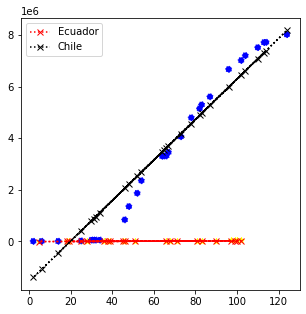

In [69]:
plt.figure(figsize=(5,5))
plt.scatter(X_test_ecuador, y_test_ecuador, marker='*', linestyle='-',color='yellow')
plt.plot(X_test_ecuador, y_pred, color='red', marker='x', linestyle=':', label = "Ecuador")

plt.scatter(X_test_chile, y_test_chile, marker='o', linestyle=':',color='blue')
plt.plot(X_test_chile, model_linear.predict(X_test_chile).reshape(-1), color='black', marker='x', linestyle=':', label = "Chile")
plt.legend(loc="upper left")
plt.show()

# Comparacion Paises Bajos vs Ecuador 

In [70]:
import datetime as dt
archivo_paisesbajos = pd.read_csv('vacunacionPaisesbajos.csv')
archivo_paisesbajos['fecha'] = pd.to_datetime(archivo_paisesbajos['fecha'])   
archivo_paisesbajos['dia'] =  (archivo_paisesbajos['fecha'] - archivo_paisesbajos['fecha'].min())  / np.timedelta64(1,'D')
archivo_paisesbajos['dia']=archivo_paisesbajos.iloc[:,3:4].values
archivo_paisesbajos['dia']=archivo_paisesbajos['dia'].astype(int)
features = archivo_paisesbajos.iloc[:,3:4].values
target=archivo_paisesbajos.iloc[:,1:2].values
X_train_paisesbajos, X_test_paisesbajos, y_train_paisesbajos, y_test_paisesbajos = train_test_split(features, target, test_size=0.2)
model_linear = LinearRegression()
model_linear = model_linear.fit(X_train_paisesbajos,y_train_paisesbajos)
print("Linear Score : ",model_linear.score(X_test_paisesbajos,y_test_paisesbajos))
data_linear=pd.DataFrame({'dia':X_test_paisesbajos.reshape(-1),'y':y_test_paisesbajos.reshape(-1),'y_pred':model_linear.predict(X_test_paisesbajos).reshape(-1)})
alt.Chart(data_linear.melt('dia')).mark_line().encode(x='dia',y='value',color='variable').properties(title='Test Paises Bajos vs Prediccion Paises Bajos').interactive()

Linear Score :  0.9012460303717962


alt.Chart(...)

In [71]:
data_linear=pd.DataFrame({'dia':X_test_ecuador.reshape(-1),'y':y_test_ecuador.reshape(-1),'y_pred':y_pred})
alt.Chart(data_linear.melt('dia')).mark_line().encode(x='dia',y='value',color='variable').properties(title='Test Ecuador vs Prediccion Ecuador').interactive()

alt.Chart(...)

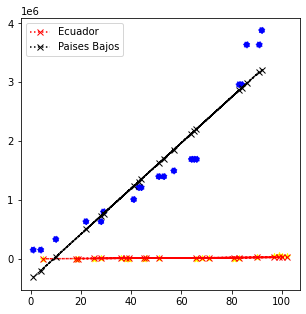

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(X_test_ecuador, y_test_ecuador, marker='*', linestyle='-',color='yellow')
plt.plot(X_test_ecuador, y_pred, color='red', marker='x', linestyle=':', label = "Ecuador")

plt.scatter(X_test_paisesbajos, y_test_paisesbajos, marker='o', linestyle=':',color='blue')
plt.plot(X_test_paisesbajos, model_linear.predict(X_test_paisesbajos).reshape(-1), color='black', marker='x', linestyle=':', label = "Paises Bajos")
plt.legend(loc="upper left")
plt.show()